In [1]:
import multiprocessing as mp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from utils.generate_bg import get_mask, generate_rand_bg, get_flat_background

In [3]:
h_size = 1
w_size = 1
bg_pool_size = 10000 * 4 * 60
cores_count = mp.cpu_count()
max_bright = h_size * w_size * 3 * 255.0

In [4]:
def get_batch_bg_bright_stat(batch_size):
    return [
        get_flat_background(h_size, w_size).sum() / max_bright
        for _ in range(batch_size)
    ]

In [5]:
%%time
flat_bg_stat = []
with mp.Pool(processes=cores_count) as pool:
    multiple_results = [
        pool.apply_async(
            get_batch_bg_bright_stat, 
            args=(bg_pool_size // cores_count,)
        ) 
        for _ in range(cores_count)
    ]
    for res in multiple_results:
        flat_bg_stat += res.get()

CPU times: user 907 ms, sys: 190 ms, total: 1.1 s
Wall time: 50.3 s


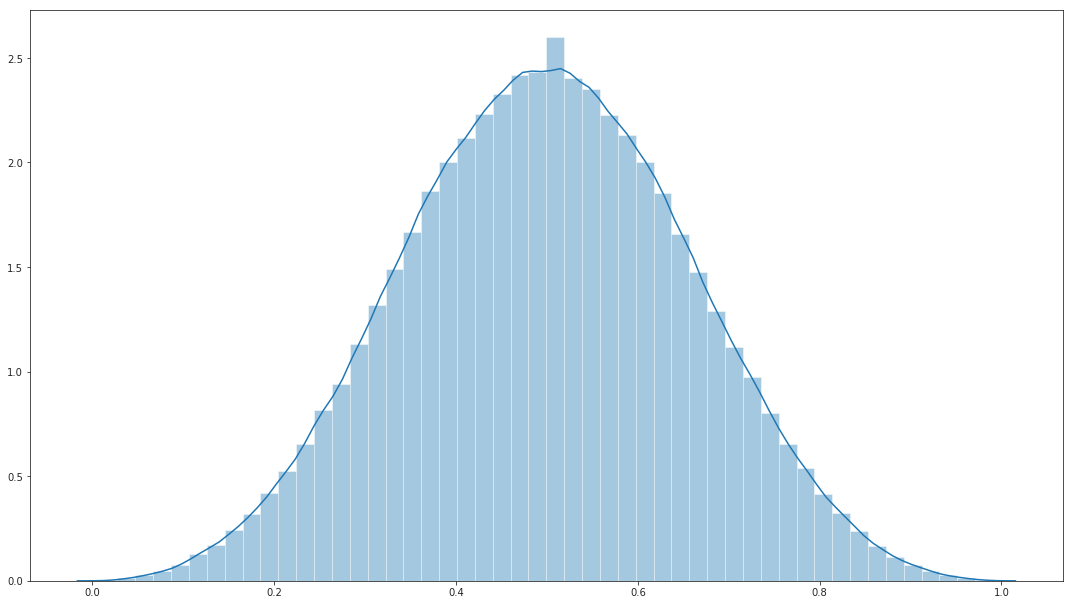

In [6]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.distplot(flat_bg_stat);